In [21]:
stat_to_compare = "OPS"
run_denom = 1 # Either PA or AB. A value of 1 means no rate

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
with open("fangraphs-teams.csv") as f:
    df = pd.read_csv(f)
df[1] = 1
df = df[~df["Season"].isin([2020, 1994])]
df["OPS"] = df["OBP"] + df["SLG"]

In [17]:
from sklearn.linear_model import LinearRegression

In [24]:
x = df[stat_to_compare].to_numpy()
y = (df["R"] / df[run_denom]).to_numpy()
# Reshape changes x to a 2d array
reg = LinearRegression().fit(x.reshape(-1, 1), y)

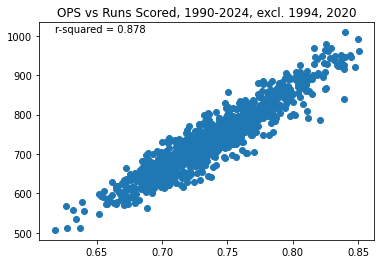

In [25]:
plt.scatter(df[stat_to_compare].to_numpy(), (df["R"] / df[run_denom]).to_numpy())
plt.annotate(f"r-squared = {reg.score(x.reshape(-1, 1), y):.3f}", (min(x), max(y)))
plt.title("OPS vs Runs Scored, 1990-2024, excl. 1994, 2020")
plt.savefig('/Users/jason/Downloads/ops_vs_runs.png', bbox_inches = "tight", dpi=500, facecolor="white")